<a href="https://colab.research.google.com/github/spinosaphb/ufc-machine-learning/blob/main/activities/classification/A3/knn_with_wine[stratified].ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import knn
import matplotlib.pyplot as plt

In [66]:
path = 'https://raw.githubusercontent.com/spinosaphb/ufc-machine-learning/main/datasets/winequality-white.csv'
df = pd.read_csv(path, delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
quality = np.array(df['quality'])
x_plot = [0,1,2,3,4,5,6,7,8,9,10]
y_plot = []
print(f'---Quality Wine Withe---'.center(30))
for i in x_plot:
    qualitySum = np.sum(quality == i)
    y_plot.append(qualitySum)
    print(f'{i}: {qualitySum}')


   ---Quality Wine Withe---   
0: 0
1: 0
2: 0
3: 20
4: 163
5: 1457
6: 2198
7: 880
8: 175
9: 5
10: 0


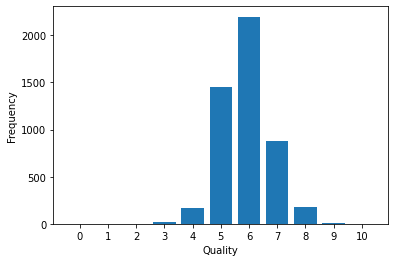

In [68]:
plt.bar(x_plot, y_plot, align='center') # A bar chart
plt.xticks(x_plot)
plt.xlabel('Quality')
plt.ylabel('Frequency')
maxY = len(y_plot)
plt.show()

In [69]:
df.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [70]:
dfs = df.sample(frac=1, random_state=42)
# Getting X and y
X = dfs.drop('quality', axis=1)
y = dfs['quality']
# normalizing X values
minValueCol = np.array(X.min())
maxValueCol = np.array(X.max())
X_normal = (X - minValueCol) / (maxValueCol - minValueCol)
X_normal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,0.211538,0.205882,0.246988,0.156442,0.115727,0.184669,0.324826,0.127048,0.336364,0.430233,0.478495
3659,0.153846,0.441176,0.096386,0.032209,0.080119,0.111498,0.276102,0.027955,0.436364,0.360465,0.838710
907,0.317308,0.166667,0.234940,0.023006,0.080119,0.097561,0.266821,0.071139,0.509091,0.244186,0.677419
4352,0.336538,0.196078,0.210843,0.015337,0.133531,0.101045,0.322506,0.090033,0.418182,0.290698,0.435484
3271,0.259615,0.235294,0.204819,0.078221,0.103858,0.087108,0.190255,0.091190,0.509091,0.441860,0.645161
...,...,...,...,...,...,...,...,...,...,...,...
4426,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452
466,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806
3092,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387
3772,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355


In [71]:
acidity_sum = X_normal['fixed acidity'] + X_normal['volatile acidity']+ X_normal['citric acid']
X_normal['total acidity'] = acidity_sum
X_normal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity
4656,0.211538,0.205882,0.246988,0.156442,0.115727,0.184669,0.324826,0.127048,0.336364,0.430233,0.478495,0.664409
3659,0.153846,0.441176,0.096386,0.032209,0.080119,0.111498,0.276102,0.027955,0.436364,0.360465,0.838710,0.691408
907,0.317308,0.166667,0.234940,0.023006,0.080119,0.097561,0.266821,0.071139,0.509091,0.244186,0.677419,0.718914
4352,0.336538,0.196078,0.210843,0.015337,0.133531,0.101045,0.322506,0.090033,0.418182,0.290698,0.435484,0.743460
3271,0.259615,0.235294,0.204819,0.078221,0.103858,0.087108,0.190255,0.091190,0.509091,0.441860,0.645161,0.699729
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452,0.671473
466,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806,0.559287
3092,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387,0.864912
3772,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355,0.571946


## Dividing data set by quality column 

In [72]:
XByQuality = {}
for i in x_plot:
    XByQuality[i] = np.array(X_normal[y == i])
yByQuality = {}
for i in x_plot:
    yByQuality[i] = np.array(y[y == i])

In [78]:
keys = dfByQuality.keys()
X_train, X_test, y_train, y_test = ([],[],[],[]) 
for key in keys:
    percent = int(XByQuality[key].shape[0] * 0.7)
    # Getting X_train and X_test
    X_train = X_train + XByQuality[key][:percent,:].tolist()
    X_test = X_test + XByQuality[key][percent:,:].tolist()
    # Getting y_train and y_test
    y_train = y_train + yByQuality[key][:percent].tolist()
    y_test = y_test + yByQuality[key][percent:].tolist()
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test) 

array([[0.03846154, 0.13235294, 0.13855422, ..., 0.25581395, 0.        ,
        0.3093687 ],
       [0.28846154, 0.17647059, 0.20481928, ..., 0.34883721, 0.40322581,
        0.6697514 ],
       [0.46153846, 0.46078431, 0.21084337, ..., 0.47674419, 0.48387097,
        1.13316615],
       ...,
       [0.50961538, 0.18627451, 0.27108434, ..., 0.27906977, 0.38709677,
        0.96697423],
       [0.34615385, 0.15686275, 0.21686747, ..., 0.30232558, 0.72580645,
        0.71988406],
       [0.26923077, 0.2745098 , 0.1746988 , ..., 0.45348837, 0.70967742,
        0.71843937]])

In [74]:
ks = ['2k','3k','5k','7k','11k','13k','17k','23k']
knns = {}
for k in ks:
    knns[k] = []

In [75]:
for k in knns:
    for test in X_test:
        k_value = int(k.replace('k',''))
        knns[k].append( knn.predict_classification(X_train, y_train, test, k_value) )

In [76]:
for k in ks:
    hits = np.sum(knns[k] == y_test)
    accuracy = hits/y_test.shape[0]*100
    print(f'accuracy with {k}: {round(accuracy, 2)}%')

accuracy with 2k: 55.98%
accuracy with 3k: 53.87%
accuracy with 5k: 54.21%
accuracy with 7k: 53.6%
accuracy with 11k: 55.16%
accuracy with 13k: 53.6%
accuracy with 17k: 54.28%
accuracy with 23k: 54.89%
